In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from random import random
import numpy as np

In [130]:
df = pd.read_csv("SpotifyData.csv")

In [131]:
#grouped.drop(['instrumentalness', 'acousticness', 'speechiness', 'key', 'mode', 'danceability', "artist", "song", "liveness"], axis = 1, inplace=True)
df.dropna(axis=0, inplace=True)
df['duration'] = df['duration'] / 1000
df.drop(df[df['popularity']<= 40].index, inplace=True)
df

,artist,song,duration,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Britney Spears,Oops!...I Did It Again,211.160,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,blink-182,All The Small Things,167.066,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,Faith Hill,Breathe,250.546,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,Bon Jovi,It's My Life,224.493,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,*NSYNC,Bye Bye Bye,200.560,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181.026,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958
1996,Taylor Swift,Cruel Summer,178.426,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994
1997,Blanco Brown,The Git Up,200.593,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984
1998,Sam Smith,Dancing With A Stranger (with Normani),171.029,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998


In [132]:

y = df['popularity'].values
X = df[['duration', 'year', 'energy', 'loudness', 'valence', 'tempo']].values

In [133]:
length = len(df.index)
split = int(length * 0.7)
X_train = X[:split]
#_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = X[split:]
#X_test = np.c_[np.ones(X_test.shape[0]), X_test]
y_train = y[:split]
y_test = y[split:]
print(y_train)


[77 79 66 ... 73 56 65]


In [134]:
coefficients = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
intercept = coefficients[0]
coefficients = coefficients[1:]
print(intercept)

print(coefficients)

-0.005019106066876038
[ 0.03575941 -3.25365249  0.82129414 -1.83150062  0.01566123]


In [135]:
print(X_test.shape)
print(np.concatenate(([intercept], coefficients)))

(534, 6)
[-0.00501911  0.03575941 -3.25365249  0.82129414 -1.83150062  0.01566123]


In [136]:
y_pred = X_test @ np.concatenate(([intercept], coefficients))

ytest_list = y_test.tolist()
ypred_list = y_pred.tolist()

for actual, prediction in zip(ytest_list, ypred_list):
    print(f"Actual: {actual}, Prediction: {prediction}")


Actual: 62, Prediction: 64.86640311698265
Actual: 72, Prediction: 65.03971531869931
Actual: 61, Prediction: 65.44127388858382
Actual: 74, Prediction: 64.29018012292534
Actual: 76, Prediction: 66.63910139724695
Actual: 57, Prediction: 64.59725501082767
Actual: 77, Prediction: 65.59626216641725
Actual: 69, Prediction: 61.96845698698359
Actual: 66, Prediction: 65.73158937114367
Actual: 78, Prediction: 62.68133689624927
Actual: 78, Prediction: 64.56460793116581
Actual: 79, Prediction: 64.74373901686232
Actual: 78, Prediction: 64.40721754244097
Actual: 79, Prediction: 65.5348293372867
Actual: 59, Prediction: 65.76051614411601
Actual: 72, Prediction: 64.42248709427997
Actual: 66, Prediction: 65.33393205661909
Actual: 68, Prediction: 63.42759073645256
Actual: 73, Prediction: 63.633208346007336
Actual: 65, Prediction: 65.06334215090614
Actual: 76, Prediction: 62.906976816476224
Actual: 67, Prediction: 66.23014422923866
Actual: 83, Prediction: 63.29240592768998
Actual: 57, Prediction: 65.761643

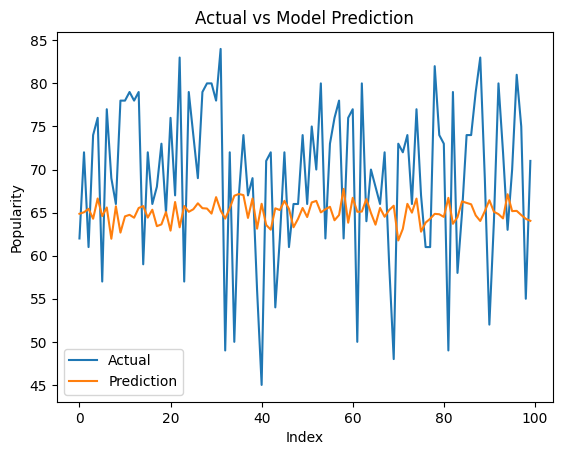

In [137]:


plt.plot([x for x in range(100)], ytest_list[:100], label='Actual')
plt.plot([x for x in range(100)], ypred_list[:100], label='Prediction')
plt.xlabel('Index')
plt.ylabel('Popularity')
plt.title('Actual vs Model Prediction')

plt.legend()
plt.show()

In [138]:
for i in range(len(X_test)):
    mse = ((y_test[i] - y_pred[i])**2)/len(X_test)
print(mse)

0.6316963911388148


In [156]:
# Generate some test data
X_test = np.array([[5, 11], [6, 13], [7, 15]])
y_test = np.array([14, 16, 18])

print(y_test.shape)

coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
# Add a column of ones to X_test for the intercept
x = np.linalg.inv(X_test.T @ X_test)@ X_test.T
print(X_test)
print()
print(X_test.T)
print()
print(X_test.T @ X_test)
print()
print((np.linalg.inv(X_test.T @ X_test)))
print()
print((np.linalg.inv(X_test.T @ X_test))@ X_test.T)
print()
print(x.shape)
print(y_test.shape)
print(y_test)
print()
print((np.linalg.inv(X_test.T @ X_test))@ X_test.T @ y_test)



(3,)
[[ 5 11]
 [ 6 13]
 [ 7 15]]

[[ 5  6  7]
 [11 13 15]]

[[110 238]
 [238 515]]

[[ 85.83333333 -39.66666667]
 [-39.66666667  18.33333333]]

[[-7.16666667 -0.66666667  5.83333333]
 [ 3.33333333  0.33333333 -2.66666667]]

(2, 3)
(3,)
[14 16 18]

[-6.  4.]


In [155]:
y_test = np.array([[14, 16, 18], [13, 15, 22]])
print(y_test)

print(y_test.shape)

[[14 16 18]
 [13 15 22]]
(2, 3)
